In [8]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

#Seleccionamos estilo de ploteo
plt.style.use("ggplot")
def crear_array(archivo):
    #Lectura de documento txt con tabulación (/t) como delimitador
    array1 = np.genfromtxt(archivo, delimiter="\t")
    array1
    
    #Nos quedamos con el dato del sensor
    d_sensor = array1[:,-2]

    return d_sensor
def crear_tiempo(d_sensor):
    #Frecuencia de muestreo del dispositivo de adquisición
    Fs = 1000
    Ts = 1/Fs
    n  = np.arange(0,d_sensor.shape[0])  # t = n*Ts
    t  = n*Ts
    return t

def creacion_dt(d_sensor,t):
    #### Conversión de array a pandas ####
    #Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
    st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)

    #Creamos el dataframe con las varibles t y d_sensor
    df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
    
    #Establecemos t como index 
    df = df.set_index("t")

    return d

[499. 498. 497. ... 521. 518. 515.]


(0.0, 5000.0)

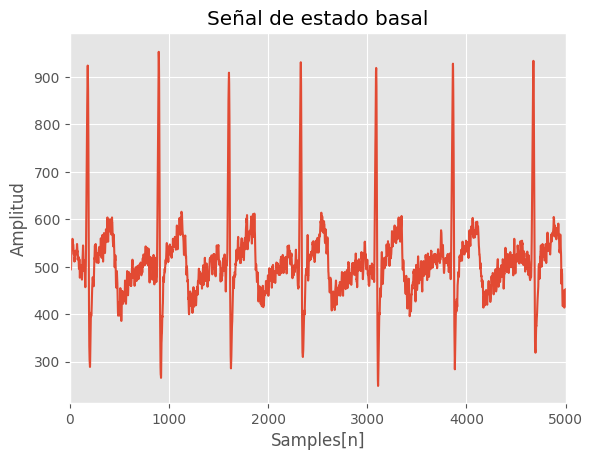

In [4]:
#Creamos un array con las señales que se captaron para el Estado Basal
basal = crear_array("Basal_pac1.txt"); print(basal)
Fs = 1000  #frecuencia de muestreo
plt.plot(basal)
plt.xlabel('Samples[n]')
plt.ylabel('Amplitud')
plt.title('Señal de estado basal')
plt.grid(True)
plt.xlim(0,5000)


Text(0.5, 1.0, 'Análisis en frecuencia')

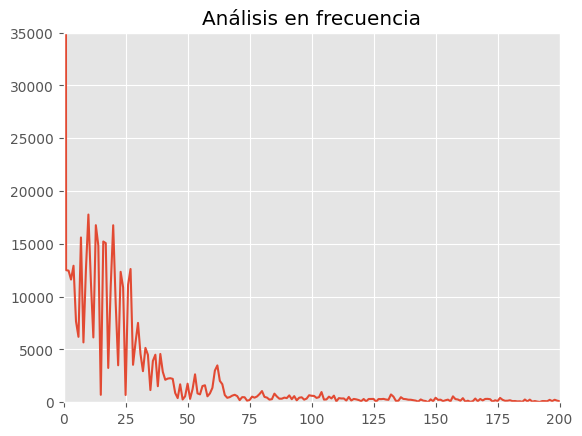

In [6]:
#Realizamos el análisis en frecuencia

senal=basal

N=2**10 # 10 bits
X3 = np.fft.fft(senal,N)
X3 = X3[0:N//2]
X3m = np.abs(X3)
F = np.linspace(0,Fs/2,N//2)
plt.plot(abs(X3));plt.xlim(0,200);plt.ylim(0,35000);plt.title('Análisis en frecuencia')

In [16]:
#calculamos el orden de filtro y la frecuencia de corte sugerida
wp=94
ws=157
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")
#usamos la sugerencia

Orden del filtro: 9
Frecuencia de corte calculada: 14.96 hz


[3.20290432e-10 6.46851722e-09 6.52216560e-08 ... 2.90127745e+02
 2.96871570e+02 3.05196170e+02]


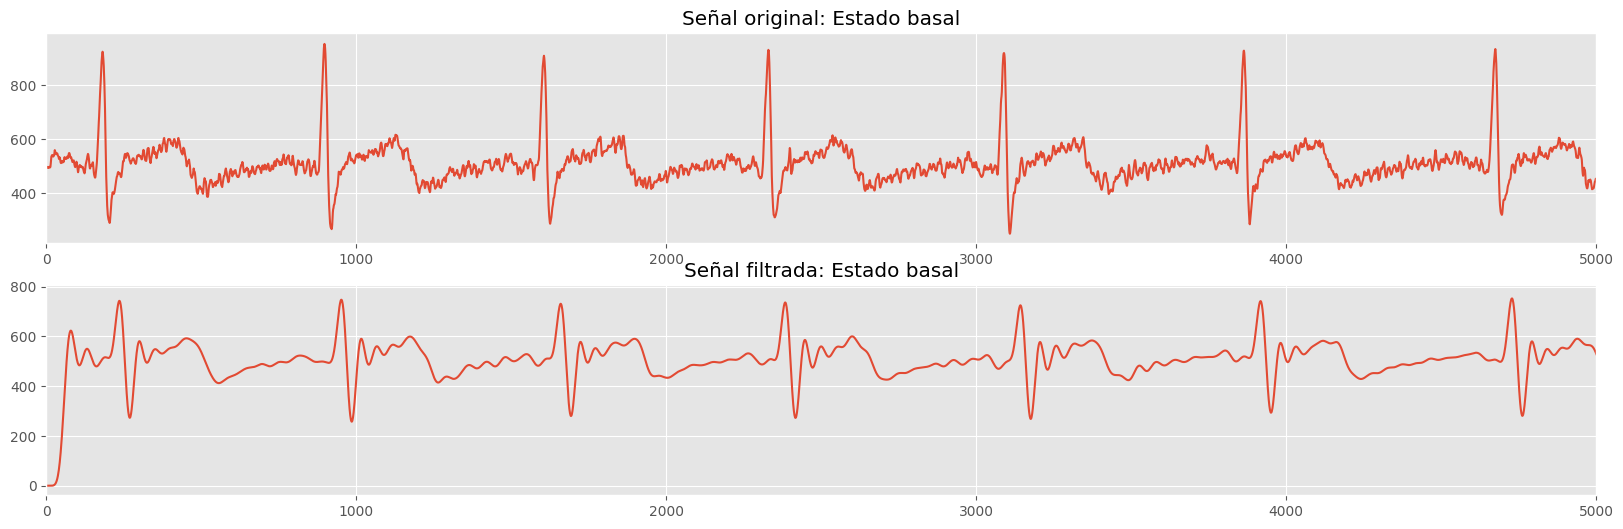

In [17]:
#Usamos la fc sugerida
senal=basal
Wc=20*2*np.pi
Fs=1000 
N_ord=10
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal);plt.title('Señal original: Estado basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Estado basal');plt.xlim(0,5000)
print(y)

(0.0, 5000.0)

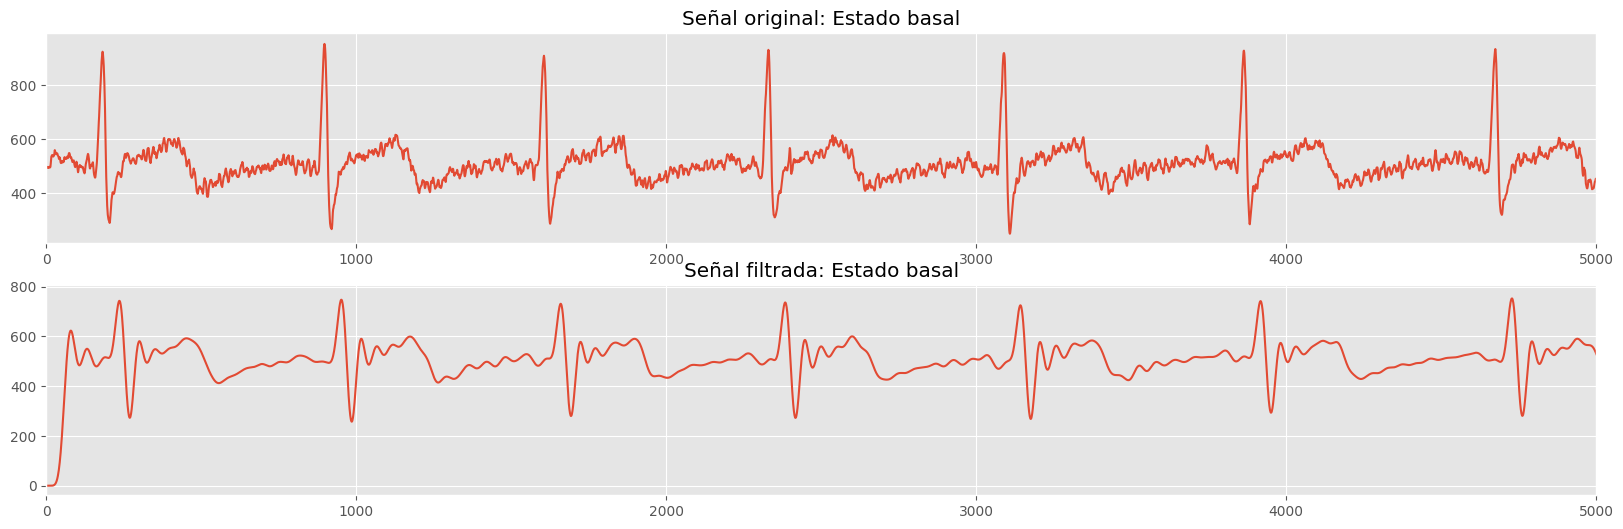

In [20]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,basal);plt.title('Señal original: Estado basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Estado basal');plt.xlim(0,5000)

(0.0, 5000.0)

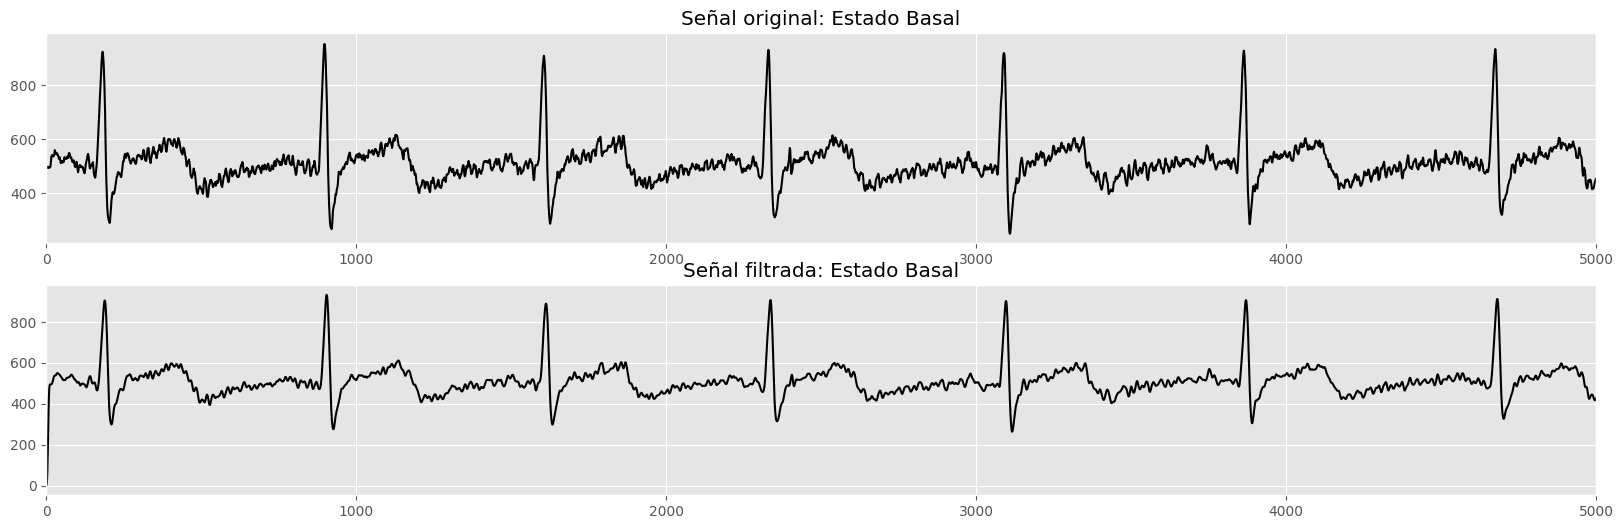

In [24]:
# Coeficientes extraidos de Pyfda
#
from scipy.signal import firwin, lfilter

b_blackman = np.array([-2.094552056898734e-18,0.003034066721839687,0.014580168473481207,0.0390825116714423,0.0772588321610623,0.12172524448293782,0.15816651137549176,0.17230533022748998,0.15816651137549176,0.12172524448293782,0.0772588321610623,0.0390825116714423,0.014580168473481207,0.003034066721839687,-2.094552056898734e-18])
y = lfilter(b_blackman, np.array(1),basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,basal,'k');plt.title('Señal original: Estado Basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Estado Basal');plt.xlim(0,5000)

In [27]:
#FIR Hamming

(0.0, 5000.0)

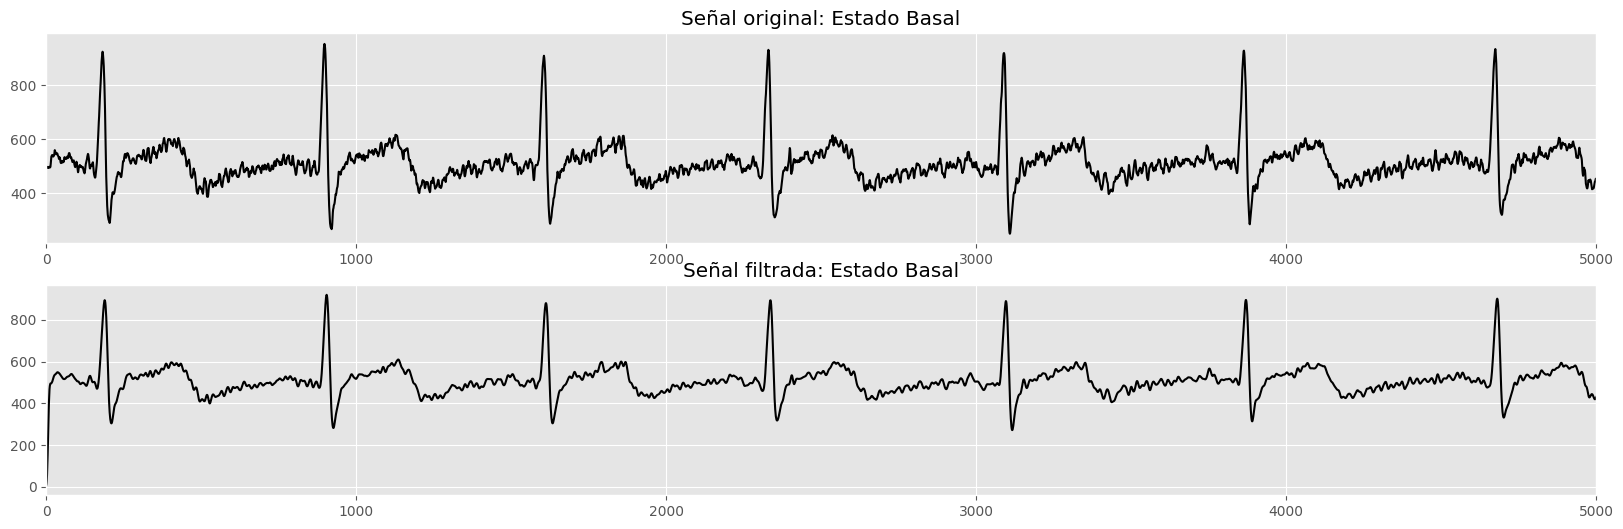

In [25]:

b_Hamming = np.array([0.009374095127456605,0.015248989077090288,0.03168550100018446,0.05610992951780696,0.08390910152312904,0.10944317615842664,0.12734290789953823,0.13377259939273567,0.12734290789953823,0.10944317615842664,0.08390910152312904,0.05610992951780696,0.03168550100018446,0.015248989077090288,0.009374095127456605])
y = lfilter(b_Hamming, np.array(1),basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,basal,'k');plt.title('Señal original: Estado Basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Estado Basal');plt.xlim(0,5000)